# 03. 머신러닝 개요

Machine Learning: 명시적으로 프로그램을 작성하지 않고 컴퓨터가 스스로 규칙을 학습하는 연구 분야

> Supervised Learning(지도 학습)
* 정답이 있는 데이터를 통해
* 데이터 분류 올바른 결과 예측

> Unsupervised Learning(비지도 학습)
* 정답이 없는 데이터를 통해
* 데이터의 유의미한 패턴/구조 발견

> Reinforcement Learning(강화 학습)
* 행동에 대한 보상을 통해
* 누적 보상을 최대화 하는 의사결정

# 04. 지도 학습

Regression(회귀): 변수들 간의 상관관계를 찾는 것, 연속적인(continuous) 데이터로부터 결과를 예측
* 예측 결과가 숫자일 떄

Classification(분류): 주어진 데이터를 정해진 범주(category)에 따라 분류
* 예측 결과가가 숫자가 아닐 때

# 05~07. 선형 회귀

> Independent variable(독립 변수)
* 원인
* 입력 변수, feature

> Dependent variable(종속 변수)
* 결과
* 출력 변수, target, label

In [ ]:
# 01. Linear Rergression
# 공부 시간에 따른 시험 점수

import matplotlib.pyplot as plt # 시각화
import pandas as pd # 데이터 가공

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT/data/ScikitLearn/LinearRegressionData.csv")

In [ ]:
dataset.head() # 데이터 중 상위 5개만 출력

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
X = dataset.iloc[:, :-1].values # [row, col]
# 처음부터 마지막 컬럼 직전까지의 데이터(독립 변수)
y = dataset.iloc[:, -1].values
# 마지막 칼럼 데이터(종속 변수 - 결과)

In [ ]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습(모델 생성)

LinearRegression()

In [ ]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

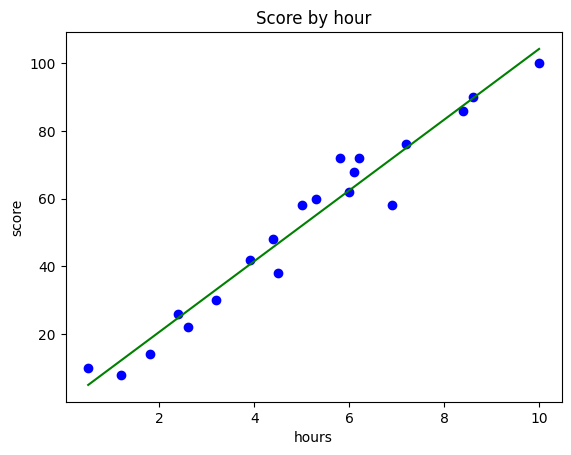

In [ ]:
plt.scatter(X, y, color = "blue") # 산점도 그래프
plt.plot(X, y_pred, color = "green") # 선 그래프
plt.title("Score by hour") # 제목
plt.xlabel("hours") # X축 이름
plt.ylabel("score") # Y축 이름
plt.show()

In [ ]:
print(f"9시간 공부했을 때 예상 점수: {reg.predict([[9]])}")

9시간 공부했을 때 예상 점수: [93.77478776]


In [ ]:
reg.coef_ # 기울기(m)

array([10.44369694])

In [ ]:
reg.intercept_ # y절편(b)

-0.218484702867201

> y = mx + b
* y = 10.4436x - 0.2184

# 08~09. 데이터 세트 분리

> Train set(훈련 세트)

> Test set(테스트 세트)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT/data/ScikitLearn/LinearRegressionData.csv")

In [ ]:
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # train : test = 8 : 2

In [ ]:
X, len(X) # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [ ]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [ ]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [ ]:
y, len(y) # 전체 데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [ ]:
y_train, len(y_train) # 훈련 세트 y

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [ ]:
y_test, len(y_test) # 테스트 세트 y

(array([ 90,   8, 100,  38]), 4)

> 분리된 데이터를 통한 모델링

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

> 데이터 시각화(훈련 세트)

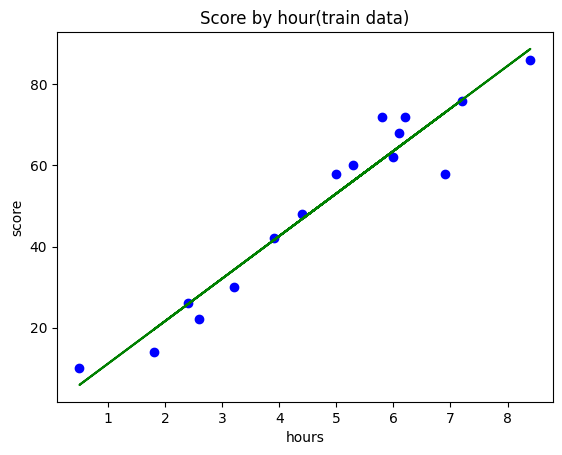

In [ ]:
plt.scatter(X_train, y_train, color = "blue") # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color = "green") # 선 그래프
plt.title("Score by hour(train data)") # 제목
plt.xlabel("hours") # X축 이름
plt.ylabel("score") # Y축 이름
plt.show()

> 데이터 시각화(테스트 세트)

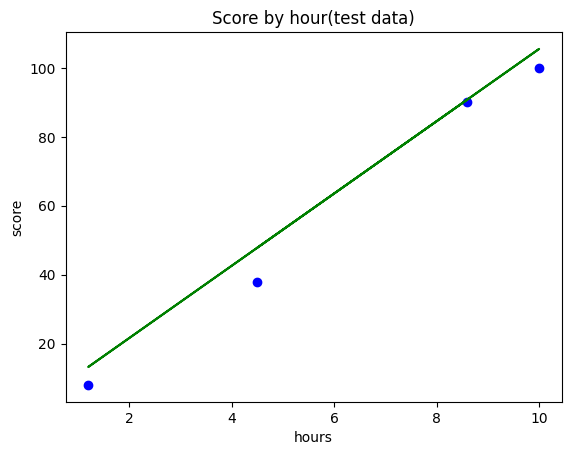

In [ ]:
plt.scatter(X_test, y_test, color = "blue") # 산점도 그래프
plt.plot(X_test, reg.predict(X_test), color = "green") # 선 그래프
plt.title("Score by hour(test data)") # 제목
plt.xlabel("hours") # X축 이름
plt.ylabel("score") # Y축 이름
plt.show()

In [ ]:
reg.coef_

array([10.49161294])

In [ ]:
reg.intercept_

0.6115562905169369

> 모델 평가

In [ ]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [ ]:
reg.score(X_train, y_train) # 훈 련세트를 통한 모델 평가

0.9356663661221668

# 10~11. Gradient Descent(경사 하강법)

> 실제값과 예측값 차이의 제곱의 합을 최소화
* sum(y - yh)**2

> 잔차 제곱의 합: RSS(Residual Sum of Squares)
* = SSR(Sum of Squared Residuals)

> 최소제곱법: OLS(Ordinary Least Squares)
* = Least Square Method

> max_iter
* 훈련 세트 반복 횟수 (Epoch 횟수)

> eta0
* 학습률 (learning rate)
>> 지수 표기법
 * 1e-3 = 0.001(10^-3)
 * 1e+4 = 100000 (10^4)

In [ ]:
from sklearn.linear_model import SGDRegressor # SGD: Stochastic Descent(확률적 경사 하강법)
sr = SGDRegressor(max_iter = 1000, eta0 = 0.01, random_state = 0) # verbose = 1
sr.fit(X_train, y_train)

SGDRegressor(random_state=0)

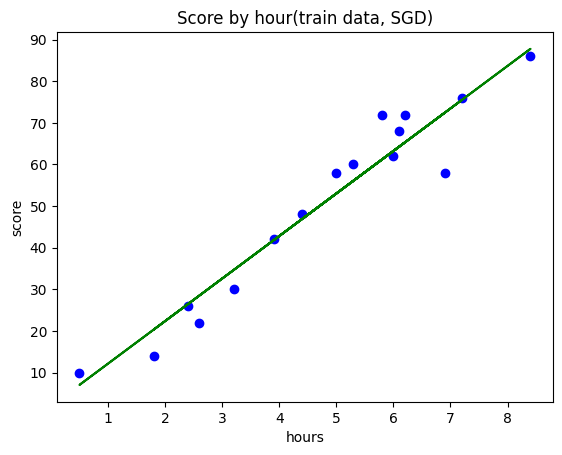

In [ ]:
plt.scatter(X_train, y_train, color = "blue") # 산점도 그래프
plt.plot(X_train, sr.predict(X_train), color = "green") # 선 그래프
plt.title("Score by hour(train data, SGD)") # 제목
plt.xlabel("hours") # X축 이름
plt.ylabel("score") # Y축 이름
plt.show()

In [ ]:
sr.coef_, sr.intercept_

(array([10.22237179]), array([1.90890387]))

In [ ]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9730031493659074

In [ ]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9350491123309401